In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aQtezwwShZ5PLACCdz9e")
project = rf.workspace("person-id").project("egyptain-person-id-q1y51")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.3


Extracting Dataset Version Zip to Egyptain-Person-ID-1 in yolov11:: 100%|██████████| 7051/7051 [00:00<00:00, 8841.78it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.6/8062.4 GB disk)


In [3]:
!yolo task=detect mode=train model=yolo11s.pt data=/kaggle/working/Egyptain-Person-ID-1/data.yaml  epochs=100 imgsz=640 batch=32

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Egyptain-Person-ID-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

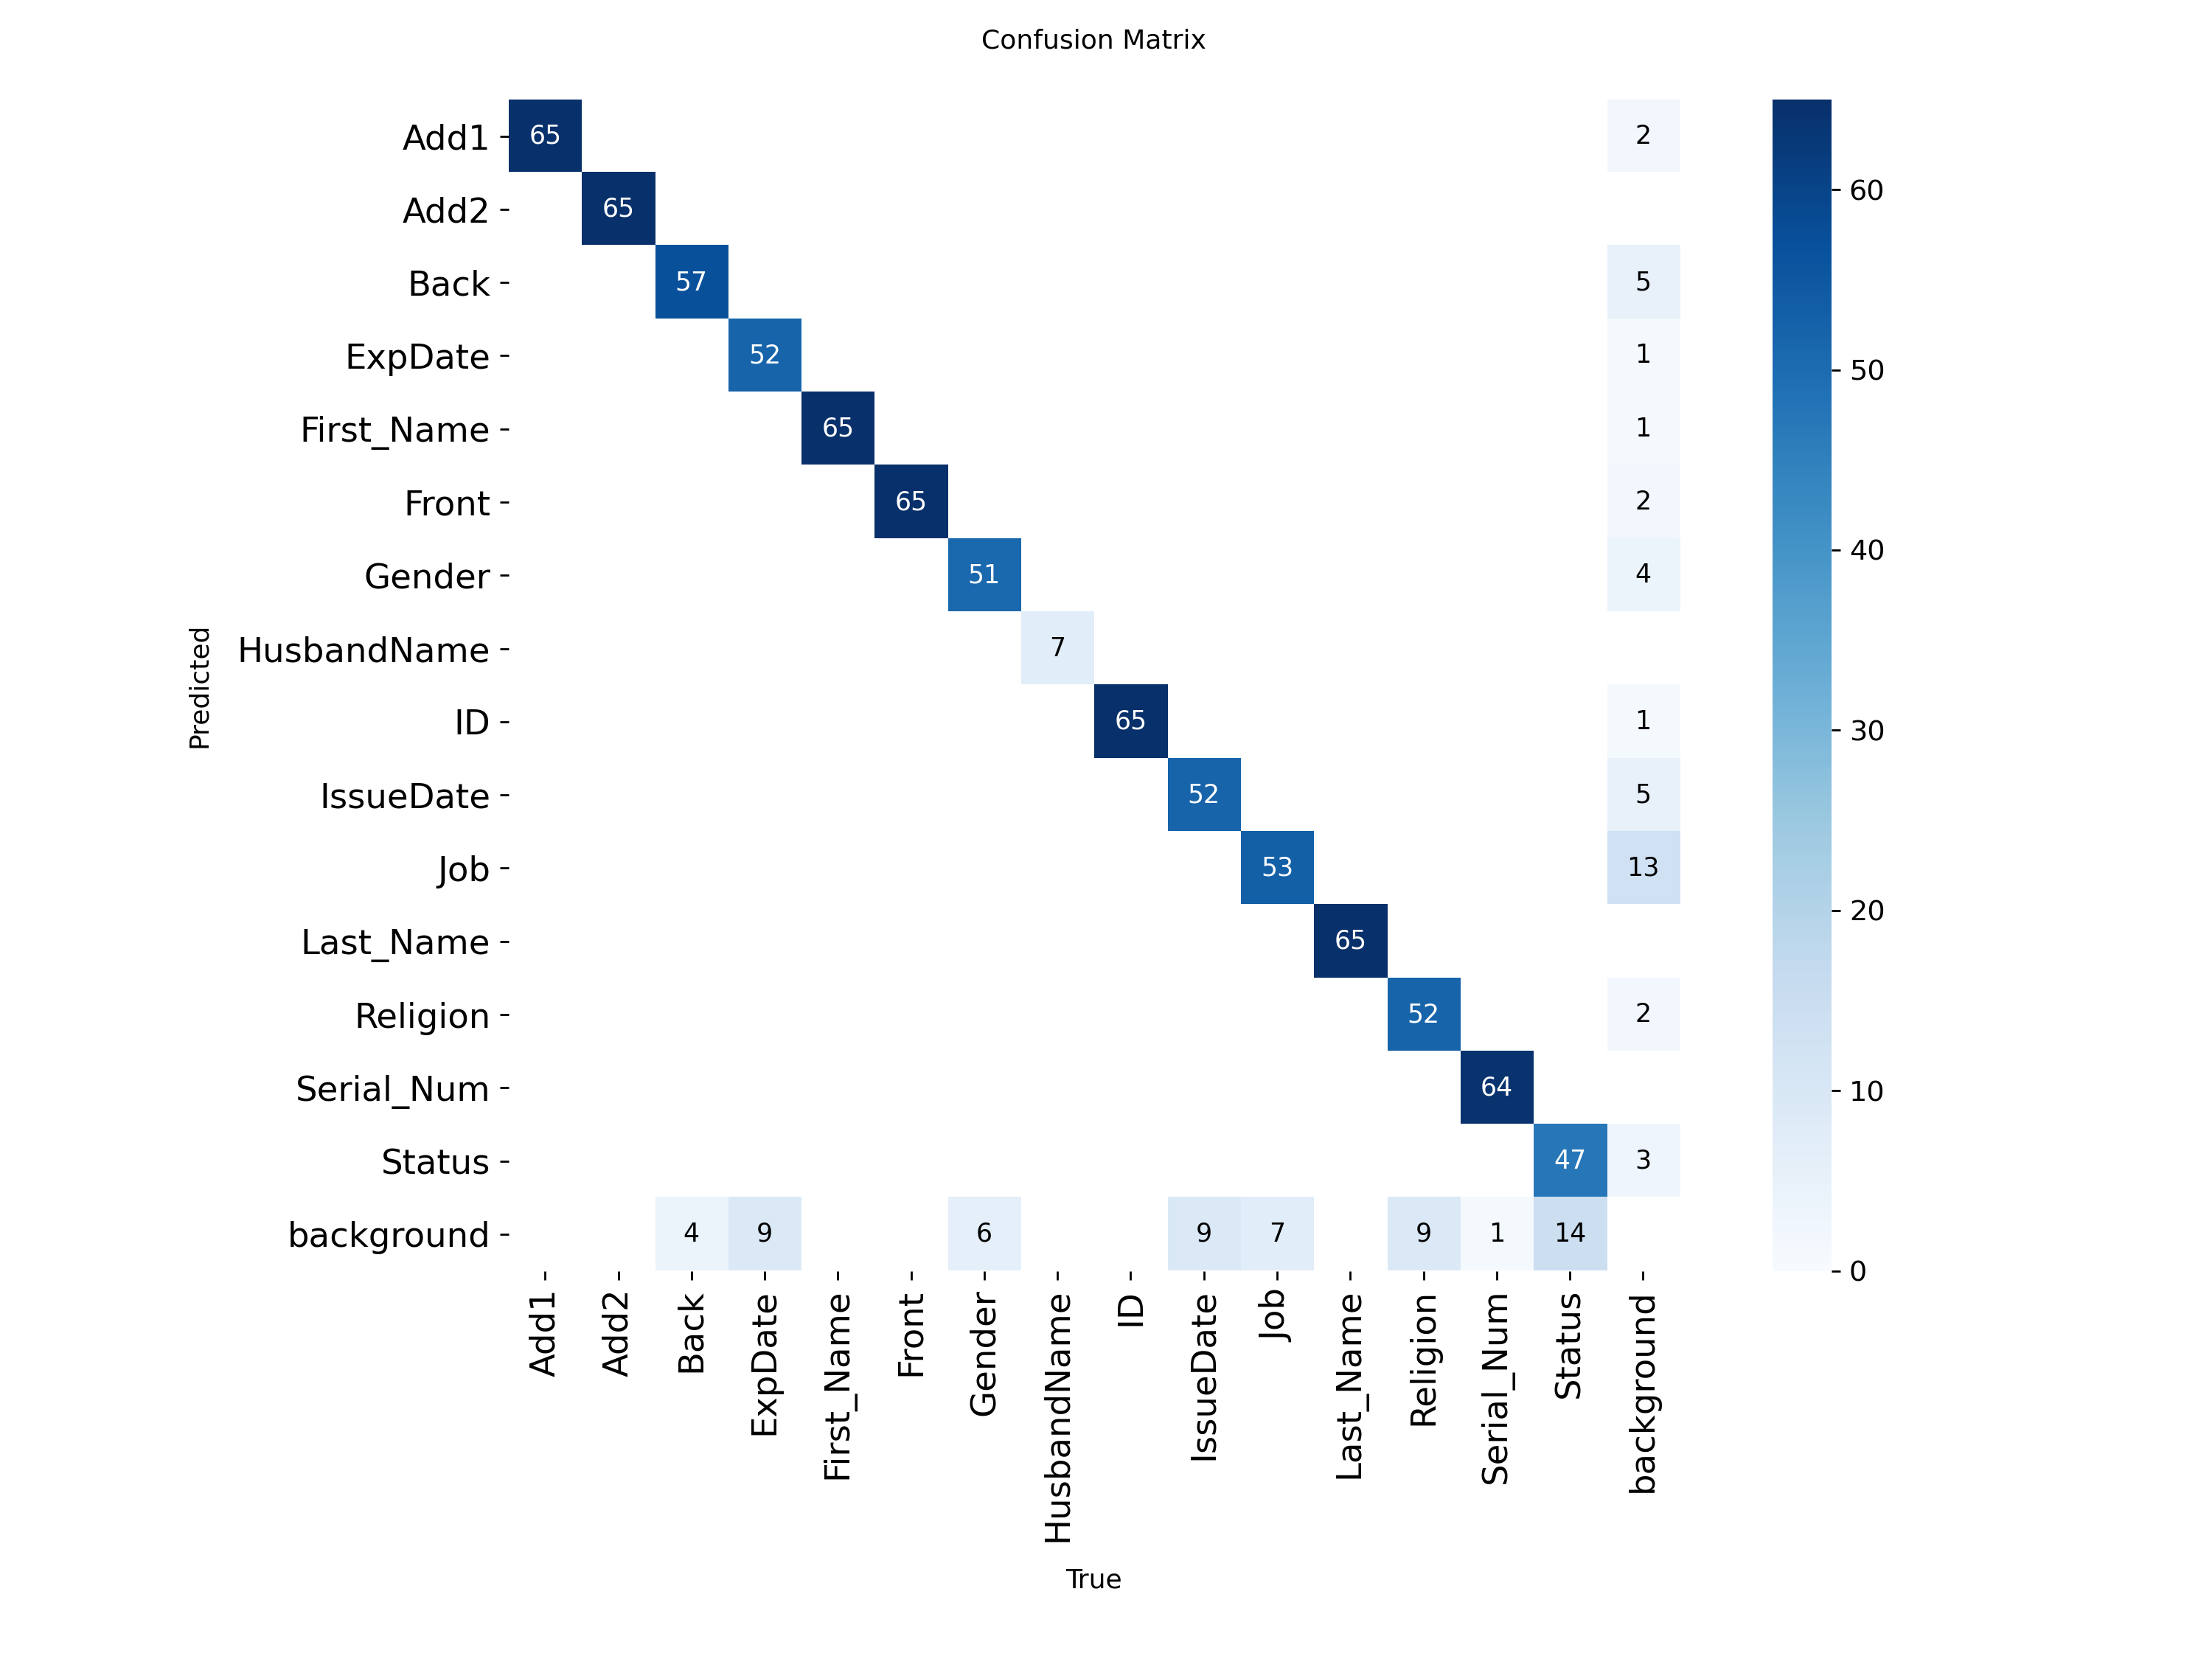

In [4]:
from IPython.display import Image, display
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

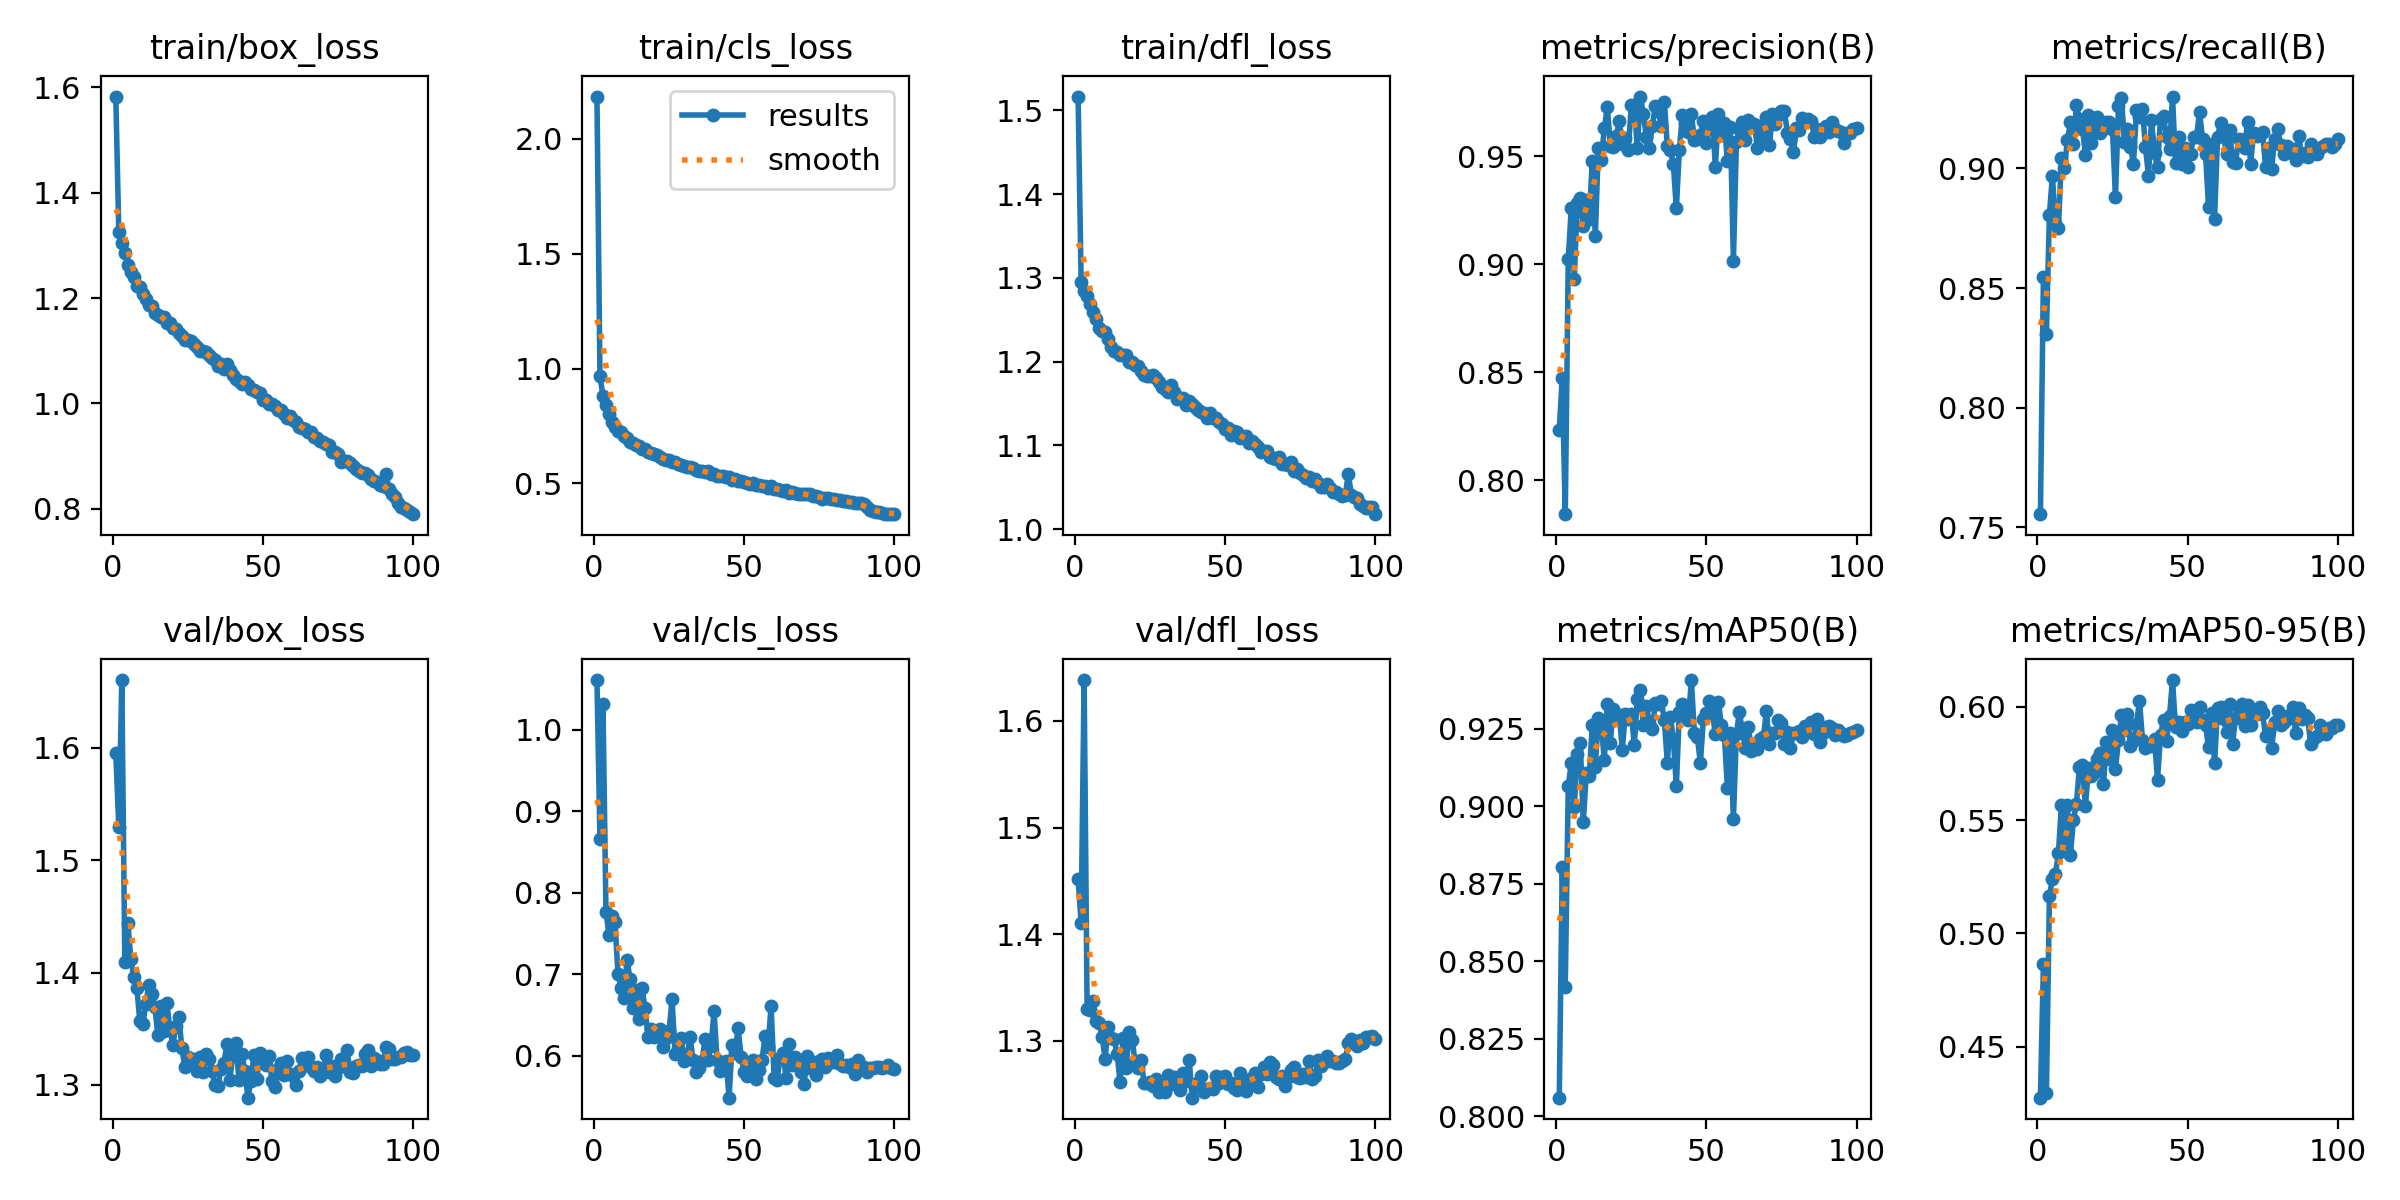

In [5]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

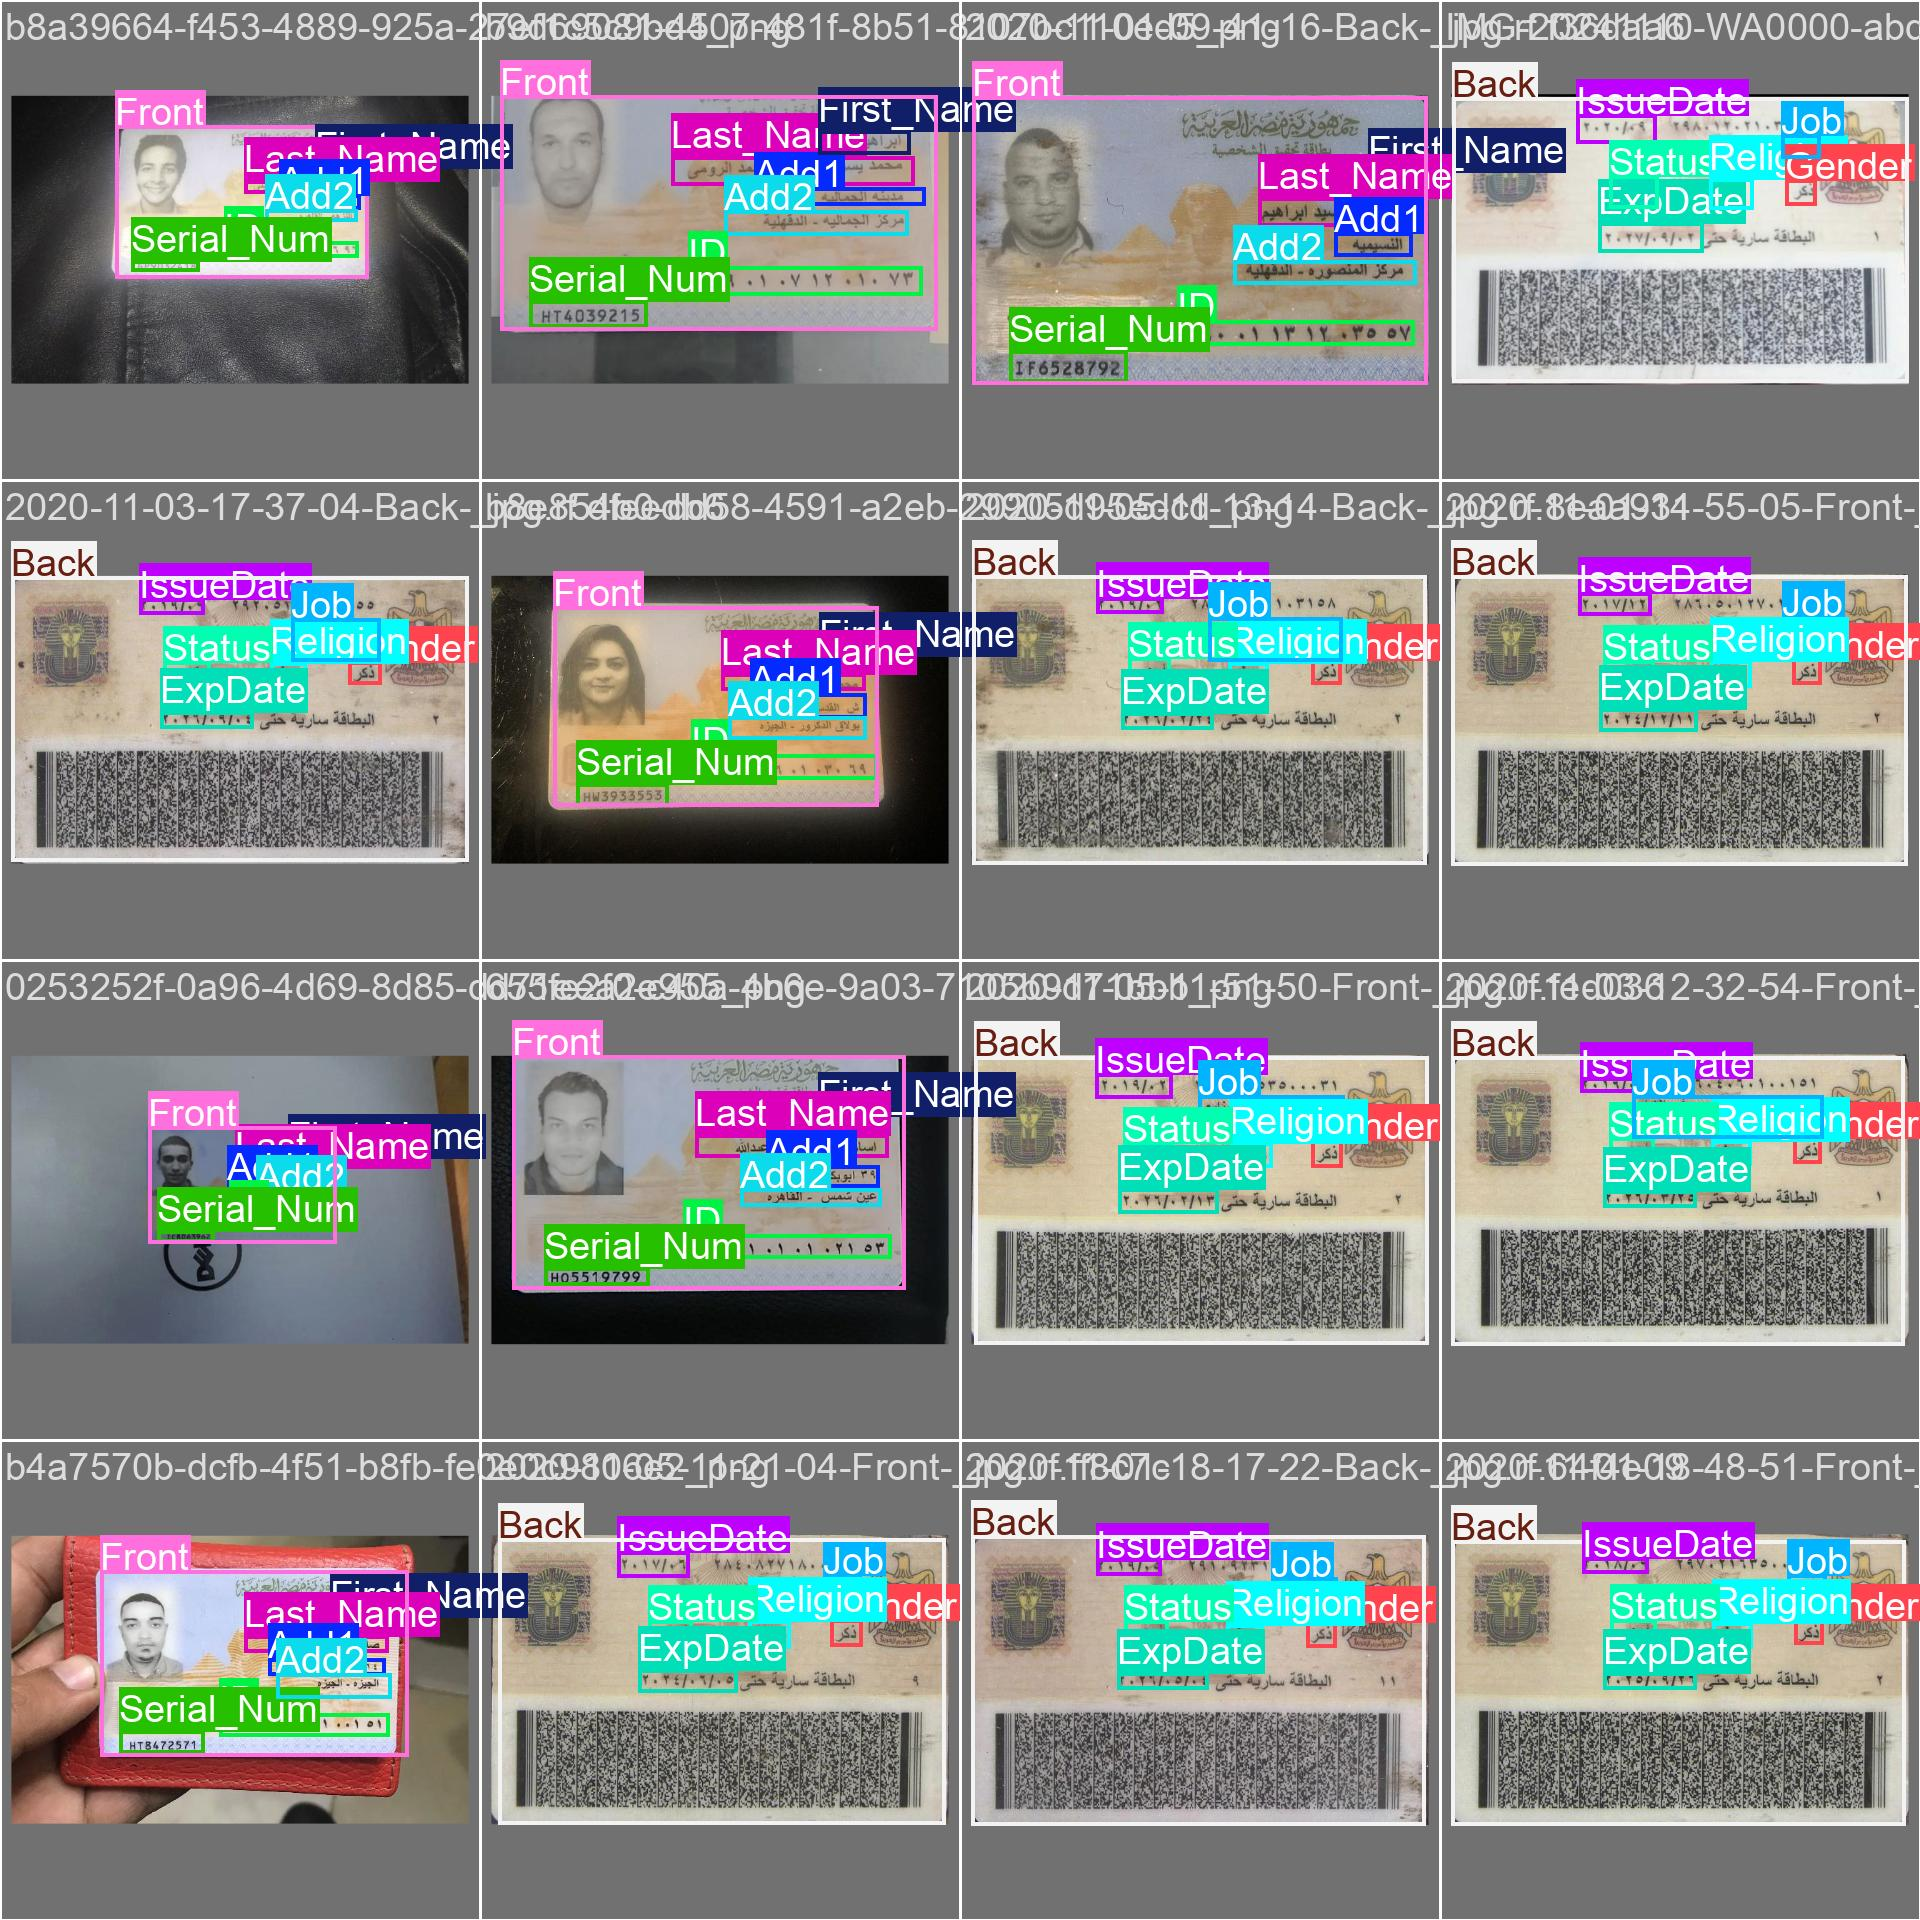

In [6]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=1000))

## **Val**

In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/working/Egyptain-Person-ID-1/data.yaml imgsz=640

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1361.5±362.9 MB/s, size: 40.0 KB)
val: Scanning /kaggle/working/Egyptain-Person-ID-1/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 126/126 2590599.5it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 3.1it/s 2.6s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        126        884      0.966      0.928      0.938      0.613
                  Add1         65         65       0.98          1      0.995      0.615
          

## **Test**

In [8]:
!yolo task=detect mode=test model=runs/detect/train/weights/best.pt data=/kaggle/working/Egyptain-Person-ID-1/data.yaml imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=test'. Valid modes are ['train', 'benchmark', 'predict', 'track', 'val', 'export'].

    Arguments received: ['yolo', 'task=detect', 'mode=test', 'model=runs/detect/train/weights/best.pt', 'data=/kaggle/working/Egyptain-Person-ID-1/data.yaml', 'imgsz=640']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['segment', 'classify', 'obb', 'pose', 'detect']
                MODE (required) is one of ['train', 'benchmark', 'predict', 'track', 'val', 'export']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that overrid